### SARIMA

The **SARIMA model** (Seasonal Autoregressive Integrated Moving Average) is an extension of the ARIMA model that accounts for seasonality in time series data. While ARIMA models handle non-seasonal time series data, SARIMA models are useful when the data exhibits repeating patterns or seasonality over time.

**Components of a SARIMA Model:**
SARIMA combines both non-seasonal and seasonal parts into one model. It is typically represented as SARIMA(p, d, q)(P, D, Q, m) where: 
 
 **p, d, q are non seasonal terms:**
 
 p :Number of lag observations (AR). 
 
 d: Number of differencing steps to make the series stationary. 
 
 q: Number of lagged forecast errors (MA).

 **P,D,Q,m are seasonal terms:**
 
 P: Order of the seasonal autoregressive (AR) terms, reflects how many past values from the same season (e.g., last year or last quarter) influence the current value.
 
 D: The number of seasonal differences required to remove the seasonality in the data.
 
 Q: Order of the seasonal moving average (MA) terms, captures how past seasonal forecast errors influence current value.
 
 m: The number of time steps in each season (e.g., 12 for monthly data with yearly seasonality).


### Import Relevant Libraries and Data

In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pmd

In [22]:
df = pd.read_csv("../data/log_stock_data.csv")
df.Date = pd.to_datetime(df.Date).dt.date

In [23]:
df.head()

,Date,LogStockValue
0,2015-01-02,3.297687
1,2015-01-09,3.271848
2,2015-01-16,3.217275
3,2015-01-23,3.244154
4,2015-01-30,3.298057


### Split Data into train and test set 

In [24]:
df.set_index('Date', inplace=True)

In [25]:
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

### Seasonal decomompose

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

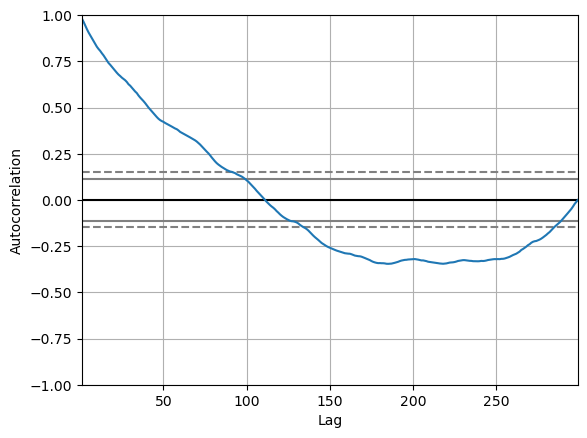

In [27]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.LogStockValue)

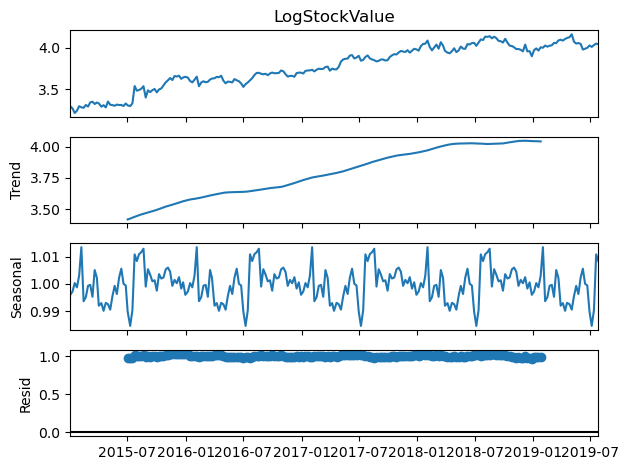

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(train.LogStockValue,model='multiplicative', period=52) #52 weeks in 1 year, we have weekly data
decomposition.plot()
plt.show()

### SARIMA modelling

In [33]:
# Define the SARIMA model with a seasonal period of 7 (weekly seasonality)
sarima_model = SARIMAX(train['LogStockValue'], 
                       order=(1, 1, 1),  # p, d, q for non-seasonal part
                       seasonal_order=(1, 1, 1, 7))  # P, D, Q, s for seasonal part

# Fit the model
model1 = sarima_model.fit()

# Display the summary of the SARIMA model
model1.summary()

/home/claudia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/claudia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.74086D+00    |proj g|=  7.37576D+00

At iterate    5    f= -1.78498D+00    |proj g|=  5.80557D-01

At iterate   10    f= -1.81361D+00    |proj g|=  2.46906D+00

At iterate   15    f= -1.86098D+00    |proj g|=  3.37326D-01

At iterate   20    f= -1.86237D+00    |proj g|=  1.73574D-01

At iterate   25    f= -1.86239D+00    |proj g|=  5.73846D-02

At iterate   30    f= -1.86247D+00    |proj g|=  1.13703D-01

At iterate   35    f= -1.86281D+00    |proj g|=  9.82207D-02

At iterate   40    f= -1.86286D+00    |proj g|=  6.07490D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                     LogStockValue   No. Observations:                  239
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 445.225
Date:                           Fri, 06 Sep 2024   AIC                           -880.449
Time:                                   15:49:45   BIC                           -863.237
Sample:                                        0   HQIC                          -873.507
                                           - 239                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1535      0.334      0.459      0.646      -0.502       0.809
ma.L1         -0.3742      0.329     -1.136      0.256      -1.020       0.271
ar.S.L7       -0.0604      0.079     -0.764      0.445      -0.215       0.095
ma.S.L7       -0.9139      0.055    -16.689      0.000      -1.021      -0.807
sigma2         0.0012   6.97e-05     16.781      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               293.57
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.48
Prob(H) (two-sided):                  0.21   Kurtosis:                         8.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/claudia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/claudia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


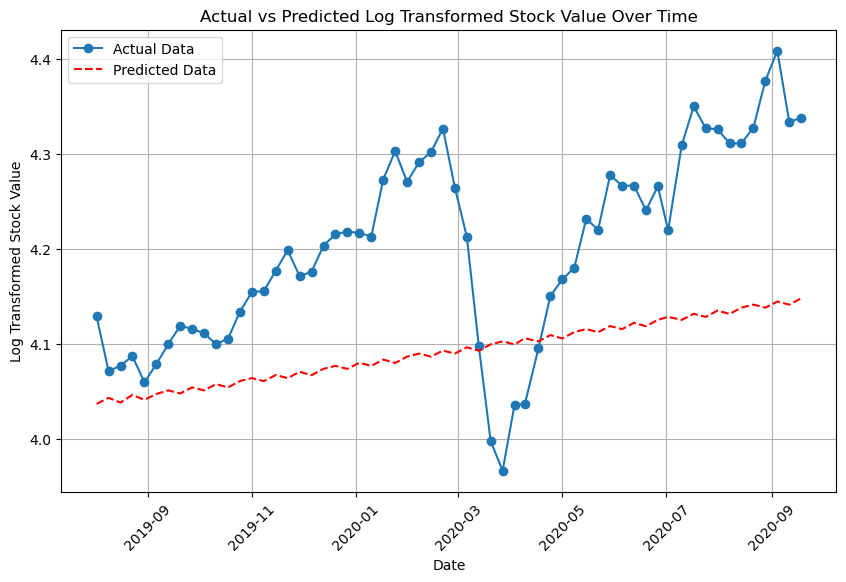

In [35]:
# predictions
n_steps = len(test) 
forecast = model1.forecast(steps=n_steps)
# Convert the index to a format suitable for plotting 
forecast.index = test.index 

# Plot the actual data
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['LogStockValue'], marker='o', label='Actual Data')

# Plot the predicted (forecasted) data
plt.plot(forecast.index, forecast, color='red', label='Predicted Data', linestyle='--')

# Adding titles and labels
plt.title('Actual vs Predicted Log Transformed Stock Value Over Time')
plt.xlabel('Date')
plt.ylabel('Log Transformed Stock Value')

# Optional: Rotate x-axis labels if dates overlap
plt.xticks(rotation=45)

# Show grid and legend for better readability
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

The model is not very accurate as we can see when we  plot the actual test values against the forecasted values but it does give us better results than the ARIMA model. At least the values are increasing and aren't constant. 

Let's explore the SARIMA model with the pmdarima library to get the best parameters 

In [43]:
import pmdarima as pmd

#best parameters recurring seasonal pattern over a yearly period
print("Yearly Seasonality")
print(pmd.auto_arima(train.LogStockValue, start_p=1, start_q=1, test='adf', m=52, seasonal=True, trace=True))

#best parameters recurring seasonal pattern over a quarterly period
print("\nBi-annual Seasonality")
print(pmd.auto_arima(train.LogStockValue, start_p=1, start_q=1, test='adf', m=26, seasonal=True, trace=True))

#best parameters recurring seasonal pattern over a quarterly period
print("\nQuarterly Seasonality")
print(pmd.auto_arima(train.LogStockValue, start_p=1, start_q=1, test='adf', m=13, seasonal=True, trace=True))

#best parameters recurring seasonal pattern over a montly period
print("\nMonthly Seasonality")
print(pmd.auto_arima(train.LogStockValue, start_p=1, start_q=1, test='adf', m=4, seasonal=True, trace=True))

Yearly Seasonality
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=-932.019, Time=2.46 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=-926.991, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=-933.778, Time=1.45 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=-935.854, Time=2.70 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=-927.028, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=-937.842, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=-935.856, Time=1.44 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=-933.843, Time=3.88 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=-936.159, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=-936.295, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=-935.769, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=-935.687, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[52]             : AIC=-936.199, Time=0.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[52] intercept
Total fit time: 12.

The pmdarima model detects no seasonal pattern over a yearly bi-annual, quarterly or monthly period, even though the data is weekly and spans multiple years.